# Breadth-First Search

The breadth-first search algorithm is a type of graph traversal used in graph theory. BFS will traverse through a graph by visiting each node in a layer based fashion starting from the first node. What this means is that BFS will mark the nodes as visited in the order of their distance from the first node. BFS can be implemented in two forms: iteratively and recursively. 


In [17]:
import networkx as nx
import matplotlib.pyplot as plt
from helper import draw_graph, clear_marks, animate_graph

gif_path = 'bfs-dfs-gifs'

# BFS Iterative

The BFS iterative algorithm makes use of the queue data structure and looping in order to traverse through the graph. The queue is used to store the nodes as they are visited and pop them when all their neighbors have been visited. Here is the pseudocode for an iterative BFS algorithm:

```python
    function BFS(Graph, node):
        init queue
        queue.push(node)
        mark node as visited
        while queue:
            queue.pop(0)
            for neighbor in node.adj:
                if the neighbor wasnt visited:
                    mark(neighbor) as visited
                    mark(edge) as visited
                    queue.push(neighbor)

```

# The Code

In [18]:
def BFS_iterative(graph, node):
    tree_edges = []
    queue = [node]
    graph.nodes[node]['marked'] = True
    
    while queue:
        popped = queue.pop(0)
        
        for neighbor in graph.adj[popped]:
            if not graph.nodes[neighbor].get('marked'):
                print(f'marking edge: ({popped}, {neighbor})')
                tree_edges.append((popped, neighbor))
                graph.edges[popped, neighbor]['marked'] = True
                graph.nodes[neighbor]['marked'] = True
                queue.append(neighbor)
    return tree_edges

# Creation of Graph

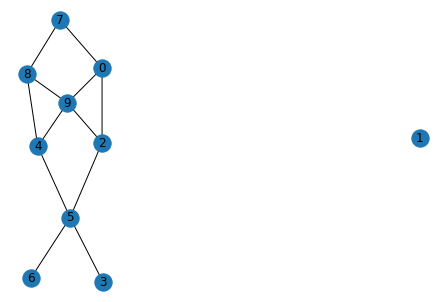

In [19]:
G = nx.erdos_renyi_graph(10, 0.3)
    
nx.draw(G, with_labels=True)

In [20]:
clear_marks(G)
tree_edges = BFS_iterative(G, 0)
tree_edges

marking edge: (0, 2)
marking edge: (0, 7)
marking edge: (0, 9)
marking edge: (2, 5)
marking edge: (7, 8)
marking edge: (9, 4)
marking edge: (5, 3)
marking edge: (5, 6)


[(0, 2), (0, 7), (0, 9), (2, 5), (7, 8), (9, 4), (5, 3), (5, 6)]

# BFS Spanning Tree

Here is a visualization of the spanning tree created the BFS iteratively.

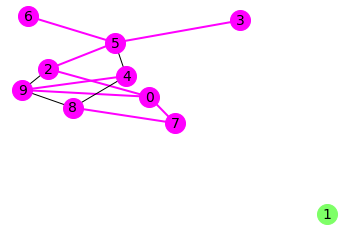

In [21]:
draw_graph(G)

In [22]:
animate_graph(G, tree_edges, f'{gif_path}/bfs-undirected.gif')

<Figure size 432x288 with 0 Axes>

# Graph Comparison

Here is a visualization of the initial graph, the graph after the BFS traversal and the resulting spanning tree from the BFS traversal:

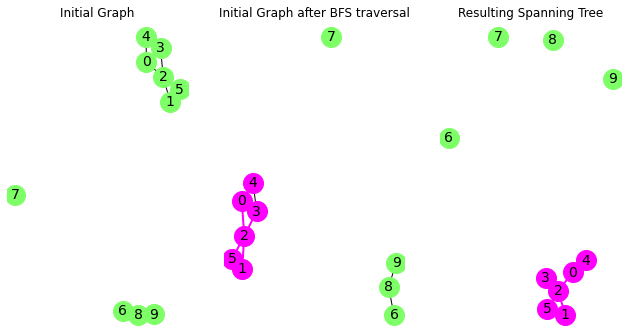

In [7]:
fig, axes = plt.subplots(ncols=3, figsize=(11,5.625))

axes[0].set_title('Initial Graph')
draw_graph(G, with_tree=False, ax=axes[0])

axes[1].set_title('Initial Graph after BFS traversal')
draw_graph(G, ax=axes[1])

G_copy = G.copy()
for edge in G_copy.edges:
    if not G_copy.edges[edge].get('marked'):
        G_copy.remove_edge(*edge)
axes[2].set_title('Resulting Spanning Tree')
draw_graph(G_copy, ax=axes[2])

# BFS Recursive

The BFS recursive algorithm uses the concept of recursion in order to traverse through the graph. Here is the pseudocode for an iterative BFS algorithm:

```python
    function BFS(Graph, queue):
        if not queue:
            return
        else:
            queue.pop(0)
            for neighbor in node.adj:
                if the neighbor wasnt visited:
                    mark(neighbor) as visited
                    mark(edge) as visited
                    queue.push(neighbor)
```



# BFS Recursive Code

In [8]:
def BFS_recursive(graph, node):
    def _BFS_recursive(graph, queue, tree_edges):
        if not queue:
            return tree_edges
        else:
            popped = queue.pop(0)
            for neighbor in graph.adj[popped]:
                if not graph.nodes[neighbor].get('marked'):
                    print(f'marking edge: ({popped}, {neighbor})')
                    tree_edges.append((popped, neighbor))
                    graph.edges[popped, neighbor]['marked'] = True
                    graph.nodes[neighbor]['marked'] = True
                    queue.append(neighbor)
            
            return _BFS_recursive(graph, queue, tree_edges)
            
    tree = []
    queue = [node]
    graph.nodes[node]['marked'] = True
    return _BFS_recursive(graph, queue, tree)

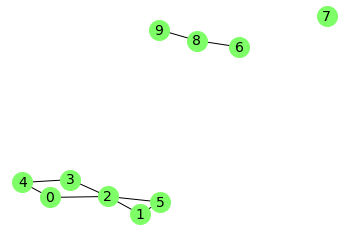

In [9]:
clear_marks(G)
draw_graph(G)

In [10]:
tree_edges = BFS_recursive(G, 0)

marking edge: (0, 2)
marking edge: (0, 4)
marking edge: (2, 1)
marking edge: (2, 3)
marking edge: (2, 5)


# BFS Spanning Tree

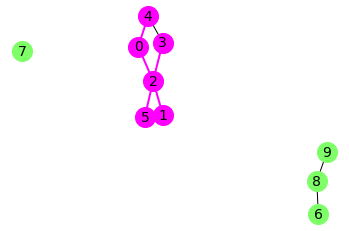

In [11]:
draw_graph(G)

# Graph Comparison

As done previously, here is a visualization of the initial graph, the graph after the BFS traversal and the resulting spanning tree from the BFS traversal:

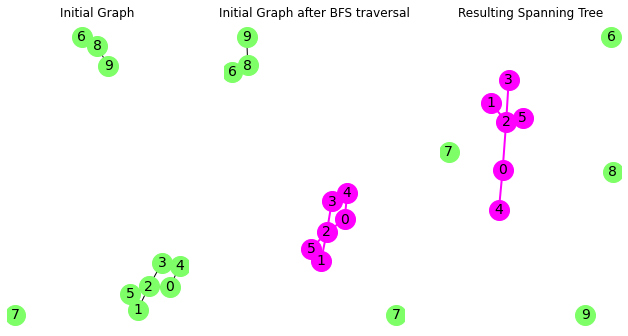

In [12]:
fig, axes = plt.subplots(ncols=3, figsize=(11,5.625))

axes[0].set_title('Initial Graph')
draw_graph(G, with_tree=False, ax=axes[0])

axes[1].set_title('Initial Graph after BFS traversal')
draw_graph(G, ax=axes[1])

G_copy = G.copy()
for edge in G_copy.edges:
    if not G_copy.edges[edge].get('marked'):
        G_copy.remove_edge(*edge)
axes[2].set_title('Resulting Spanning Tree')
draw_graph(G_copy, ax=axes[2])